In [52]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from nltk import bigrams
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
import operator

In [2]:
df = pd.read_csv('/Users/yvdsd/SandBox/Log.dms', sep='\t')

In [3]:
def parse_url(req):
    return urllib.parse.parse_qs(urllib.parse.urlparse(req).query).get('text', [''])[0]

df['query'] = df.request.apply(parse_url)

In [5]:
tv_list = ['трансляц', 'онлайн', 'online', 'эфир', 'смотреть', 
           'нтв', 'орт', 'первый канал', 'второй канал', 'прямой эфир', 
          'фильм', 'твц', 'тнт', 'сериал', 'телепередач']
stop_list = ['сбербанк', 'калькулятор', 'радио']

In [6]:
def tv_queries(df_name, list_name, stop_list_name):
    var_list = []
    [var_list.append(df_name[df_name['query'].str.contains(query)]) for query in list_name]
    var_list_droped = pd.concat(var_list, join='inner').drop_duplicates()
    return var_list_droped[~var_list_droped['query'].str.contains('|'.join(stop_list_name))]

In [7]:
df_all_tv_queries = tv_queries(df, tv_list, stop_list)

In [9]:
list_tv_queries = list(df_all_tv_queries['query'])

In [10]:
def bag_of_words(file_name):
    words = []
    for line in file_name:
        lower_line = line.lower().strip()
        new_line = lower_line.split()
        [words.append(word) for word in new_line]
    return words

In [11]:
def words_counting(file_name):
    words = {}
    for word in file_name:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1
    return(sorted(words.items(), key=operator.itemgetter(1),reverse=True))

In [13]:
cartoons_words = ['мультфильм', 'мультик', 'мультсериал', 'дисней', 'фиксики']
films_words = ['фильм', 'кино']
serials_words = ['сериал', 'серия']
porno_words = ['порно', 'секс']

In [24]:
cartoon_claster = tv_queries(df_all_tv_queries, cartoons_words, porno_words)
film_claster = tv_queries(df_all_tv_queries, films_words, porno_words + serials_words + cartoons_words)
serial_cluster = tv_queries(df_all_tv_queries, serials_words, porno_words + cartoons_words)
porno_cluster = tv_queries(df_all_tv_queries, porno_words, serials_words + cartoons_words)

In [26]:
diagram_dict = {'Фильмы': len(film_claster),
               'Сериалы': len(serial_cluster),
               'Мультфильмы': len(cartoon_claster),
               'Порно': len(porno_cluster),
               'Другое': len(df_all_tv_queries) - len(film_claster) - len(serial_cluster) - len(cartoon_claster) - len(porno_cluster)}

{'Другое': 44076,
 'Мультфильмы': 5265,
 'Порно': 2919,
 'Сериалы': 12461,
 'Фильмы': 34280}

In [53]:
pprint('Доля запросов связанных с телевидением в общем потоке - {}%'.format(len(df_all_tv_queries)/len(df)))
pprint('Количество запросов связанных с телевидением - {}'.format(len(df_all_tv_queries)))
pprint('Телевизионные запросы состоят из - {}'.format(diagram_dict))

'Доля запросов связанных с телевидением в общем потоке - 0.07424130279421944%'
'Количество запросов связанных с телевидением - 99001'
("Телевизионные запросы состоят из - {'Фильмы': 34280, 'Сериалы': 12461, "
 "'Мультфильмы': 5265, 'Порно': 2919, 'Другое': 44076}")


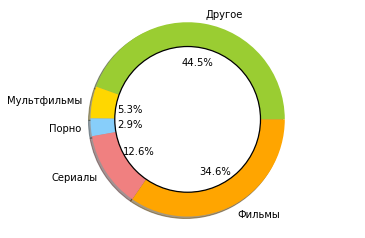

In [55]:
labels = 'Другое', 'Мультфильмы', 'Порно', 'Сериалы', 'Фильмы'
sizes = [diagram_dict['Другое'], diagram_dict['Мультфильмы'], diagram_dict['Порно'], diagram_dict['Сериалы'], diagram_dict['Фильмы']]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange']
explode = (0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()